<a href="https://colab.research.google.com/github/nithishareddy/API-Access-Behavior-Prediction/blob/main/CTML_api_access_behavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'api-access-behaviour-anomaly-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1627522%2F2839423%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240417%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240417T003444Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3De8ef1b07e969a5c419dce8caf9fcef6cf1f5ec9161d5bc23bcf20a14174a61e017332c573dc268fb06689faab835ed669a8018931c6b69f559f1c485df94973f2c89d1e0737131a84ae4f2d004a3d283fc37920501c70f4ac5684c471fb698ff7b609b22e630c700ed58668d5bff6935af8e014f75c9887aa5398c5f48638cd1eb8f6f2fcd1ab43104e5f7fb195bea3bc2b84ee4ef1b79764c28122d0cef7491491a063998b1cdcc274f217c87af8ada2a870a6b44b60242856ed4ca33f75769a25fb54767b9c3305a601a1c3002d1e960b957e9295181248faf747fff5b8fdc007f1e19daabe705d6f652c8a5d9850a00d1021e6eb149850c191bf43c5b4b3d'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 16044700 bytes downloaded
Downloaded and uncompressed: api-access-behaviour-anomaly-dataset
Data source import complete.


Index(['Unnamed: 0', '_id', 'inter_api_access_duration(sec)',
       'api_access_uniqueness', 'sequence_length(count)',
       'vsession_duration(min)', 'ip_type', 'num_sessions', 'num_users',
       'num_unique_apis', 'source', 'classification'],
      dtype='object')
Unnamed: 0                        0
_id                               0
inter_api_access_duration(sec)    4
api_access_uniqueness             4
sequence_length(count)            0
vsession_duration(min)            0
ip_type                           0
num_sessions                      0
num_users                         0
num_unique_apis                   0
source                            0
classification                    0
dtype: int64
       Unnamed: 0  inter_api_access_duration(sec)  api_access_uniqueness  \
count  1699.00000                     1695.000000            1695.000000   
mean    849.00000                        1.501123               0.173226   
std     490.60337                       21.697558        

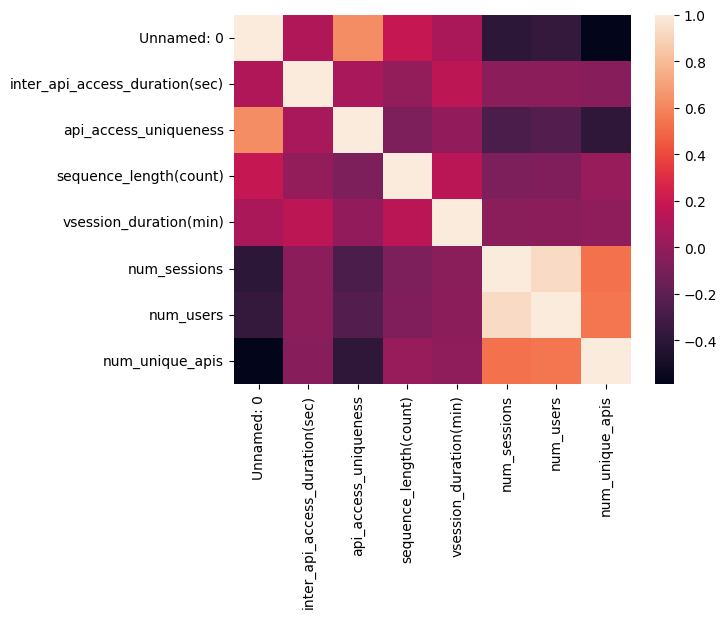

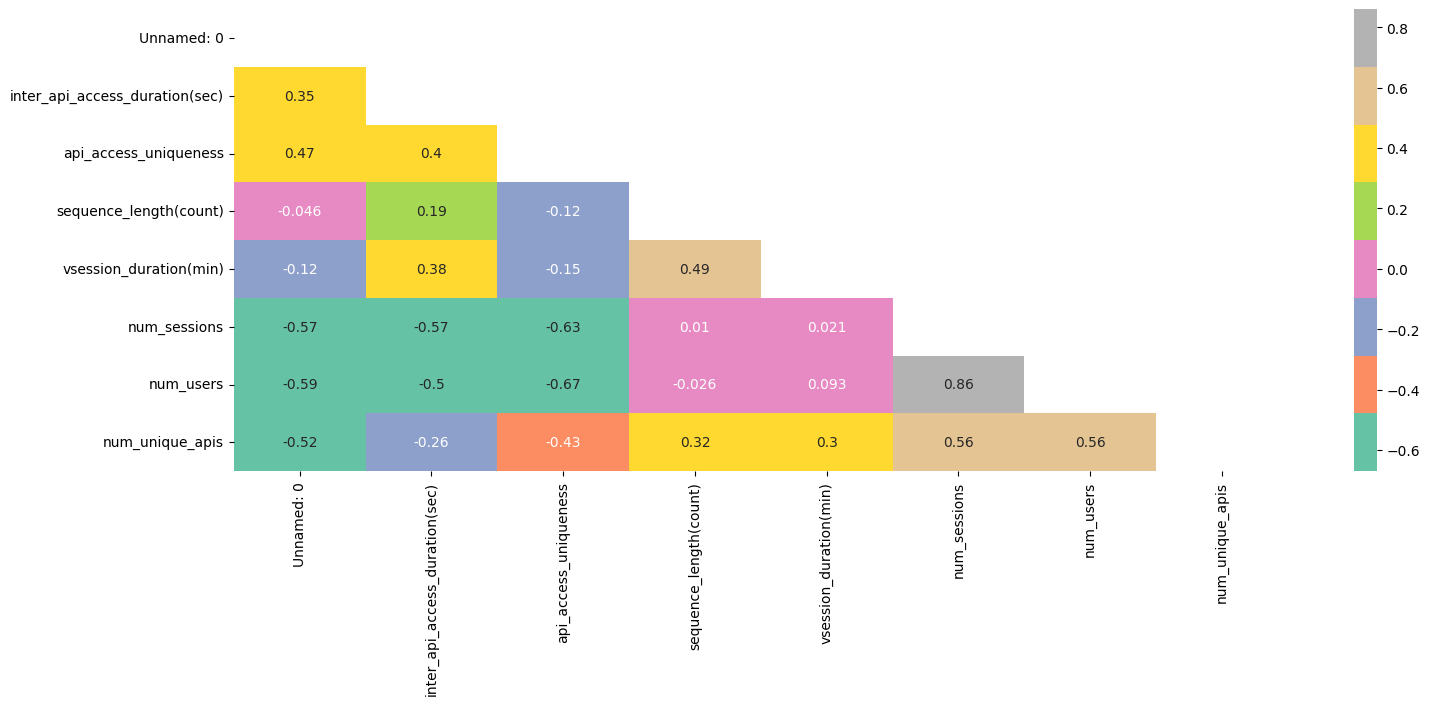

Unnamed: 0                        0
_id                               0
inter_api_access_duration(sec)    0
api_access_uniqueness             0
sequence_length(count)            0
vsession_duration(min)            0
ip_type                           0
num_sessions                      0
num_users                         0
num_unique_apis                   0
source                            0
classification                    0
dtype: int64

ip_type
source
classification


['Unnamed: 0' '_id' 'inter_api_access_duration(sec)'
 'api_access_uniqueness' 'sequence_length(count)' 'vsession_duration(min)'
 'ip_type' 'num_sessions' 'num_users' 'num_unique_apis' 'source'
 'classification' 'type_ip' 'sources' 'classifiction']
--classificxation data-- classifiction
0    1106
1     593
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The logistic regression:  1.0
the Xgb :  1.0
[LightGBM] [Info] Number of positive: 445, number of negative: 829
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1196
[LightGBM] [Info] Number of data points in the train set: 1274, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.349294 -> initscore=-0.622146
[LightGBM] [Info] Start training from score -0.622146
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

In [ ]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from keras.models import  Sequential
from keras.layers import Dense
import keras.activations,keras.metrics,keras.losses

data=pd.read_csv('/kaggle/input/api-access-behaviour-anomaly-dataset/supervised_dataset.csv')
print(data.columns)
print(data.isna().sum())
print(data.describe())
print(data.info())

data['inter_api_access_duration(sec)']=data['inter_api_access_duration(sec)'].fillna(data['inter_api_access_duration(sec)'].mean())
data['api_access_uniqueness']=data['api_access_uniqueness'].fillna(data['api_access_uniqueness'].mean())

sn.heatmap(data.corr(numeric_only = True))
plt.show()


plt.figure(figsize=(17,6))
corr = data.corr(method='kendall',numeric_only = True)
my_m=np.triu(corr)
sn.heatmap(corr, mask=my_m, annot=True, cmap="Set2")
plt.show()

print(data.isna().sum())
print()
for i in data.columns.values:
    if len(data[i].value_counts()) <5:
        print(i)

print()
cat_col=data.select_dtypes(include='object').columns.values

lab=LabelEncoder()
data['type_ip']=lab.fit_transform(data['ip_type'])
data['sources']=lab.fit_transform(data['source'])
data['classifiction']=lab.fit_transform(data['classification'])
print()
print(data.columns.values)
x=data[['sequence_length(count)','vsession_duration(min)'
 ,'num_sessions','num_users' ,'num_unique_apis'
 ,'type_ip','sources']]
y=data['classifiction']

print('--classificxation data--',data['classifiction'].value_counts())


x_train,x_test,y_train,y_test=train_test_split(x,y)

lr=LogisticRegression(max_iter=200)
lr.fit(x_train,y_train)
print('The logistic regression: ',lr.score(x_test,y_test))

xgb=XGBClassifier()
xgb.fit(x_train,y_train)
print("the Xgb : ",xgb.score(x_test,y_test))

lgb=LGBMClassifier()
lgb.fit(x_train,y_train)
print('The LGB',lgb.score(x_test,y_test))

tree=DecisionTreeClassifier(criterion='entropy',max_depth=1)
tree.fit(x_train,y_train)
print('Dtree ',tree.score(x_test,y_test))

rforest=RandomForestClassifier(criterion='entropy')
rforest.fit(x_train,y_train)
print('The random forest: ',rforest.score(x_test,y_test))

adb=AdaBoostClassifier()
adb.fit(x_train,y_train)
print('the adb ',adb.score(x_test,y_test))

grb=GradientBoostingClassifier()
grb.fit(x_train,y_train)
print('Gradient boosting ',grb.score(x_test,y_test))

bag=BaggingClassifier()
bag.fit(x_train,y_train)
print('Bagging',bag.score(x_test,y_test))
print('-----------------------------------')

models=Sequential()
models.add(Dense(units=x.shape[1],input_dim=x.shape[1],activation=keras.activations.sigmoid))
models.add(Dense(units=x.shape[1],activation=keras.activations.sigmoid))
models.add(Dense(units=x.shape[1],activation=keras.activations.relu))
models.add(Dense(units=x.shape[1],activation=keras.activations.sigmoid))

models.add(Dense(units=1,activation=keras.activations.sigmoid))
models.compile(optimizer='adam',metrics='accuracy',loss=keras.losses.binary_crossentropy)
models.fit(x_train,y_train,batch_size=20,epochs=10)
y_pred= models.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Print the predicted output
# Print x_test and y_pred in one line
print(y_test)
for x_sample, y_actual, y_sample in zip(x_test.values, y_test.values, y_pred_binary.flatten()):
    print(f"Input: {x_sample}, Actual Output: {y_actual}, Predicted Output: {y_sample}")




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

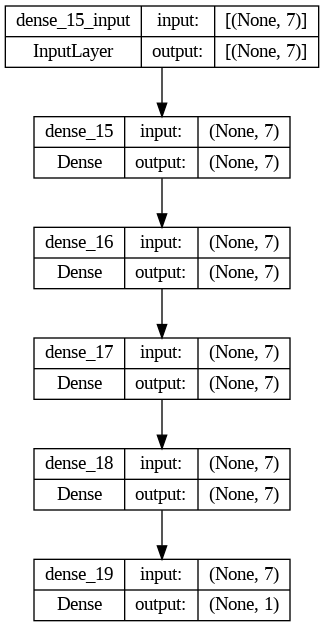

In [ ]:
from keras.utils import plot_model
# Assuming 'models' is your trained neural network model
plot_model(models, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Class 0:
  Accuracy: 0.9964028776978417
  Precision: 0.9964028776978417
  F1-score: 0.9981981981981982
Class 1:
  Accuracy: 1.0
  Precision: 1.0
  F1-score: 0.9966101694915254
14/14 [==============================] - 0s 6ms/step
Confusion Matrix:
[[277   0]
 [  1 147]]
Accuracy: 0.9976470588235294
Precision: [0.34823529 0.3490566  0.53818182 0.54014599 0.54212454 0.54411765
 0.54612546 0.54814815 0.55018587 0.55223881 0.55430712 0.58498024
 0.58730159 0.58964143 0.592      0.59437751 0.59677419 0.7628866
 0.76683938 0.77083333 0.77486911 0.77894737 0.78306878 0.78723404
 0.79144385 0.79569892 0.81318681 0.81767956 0.82222222 0.82681564
 0.83146067 0.83615819 0.84090909 0.84571429 0.925      0.93081761
 0.93037975 0.93630573 0.96078431 0.96710526 0.97350993 0.98
 0.98657718 0.99324324 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.    

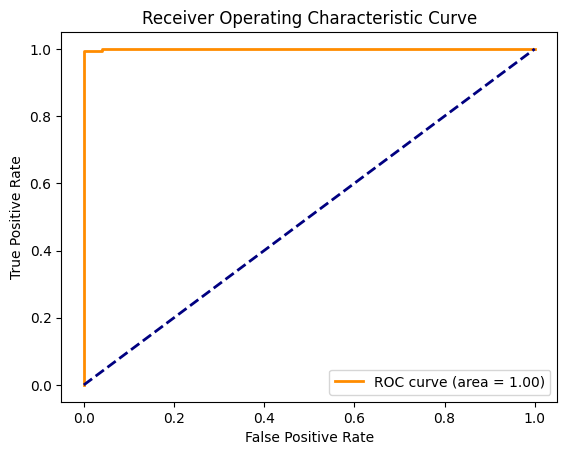

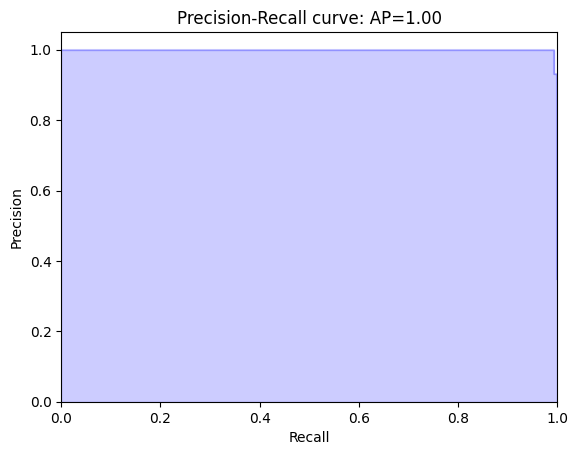

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report

# Assuming 'y_test' is the actual labels and 'y_pred_binary' is the predicted labels

# Calculate classification report
report = classification_report(y_test, y_pred_binary, output_dict=True)

# Print accuracy, precision, and F1-score for each class
for class_label, metrics in report.items():
    if class_label.isdigit():  # Check if class_label is a numeric class identifier
        print(f"Class {int(class_label)}:")
        print(f"  Accuracy: {metrics['precision']}")
        print(f"  Precision: {metrics['precision']}")
        print(f"  F1-score: {metrics['f1-score']}")

# Predict the output for the test data
y_pred = models.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate metrics
conf_matrix = confusion_matrix(y_test, y_pred_binary)
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_pred)

# Print and plot metrics
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(avg_precision))
plt.show()


Index(['Unnamed: 0', '_id', 'inter_api_access_duration(sec)',
       'api_access_uniqueness', 'sequence_length(count)',
       'vsession_duration(min)', 'ip_type', 'behavior', 'behavior_type',
       'num_sessions', 'num_users', 'num_unique_apis', 'source'],
      dtype='object')

Unnamed: 0                        0
_id                               0
inter_api_access_duration(sec)    1
api_access_uniqueness             1
sequence_length(count)            0
vsession_duration(min)            0
ip_type                           0
behavior                          0
behavior_type                     0
num_sessions                      0
num_users                         0
num_unique_apis                   0
source                            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34423 entries, 0 to 34422
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   U

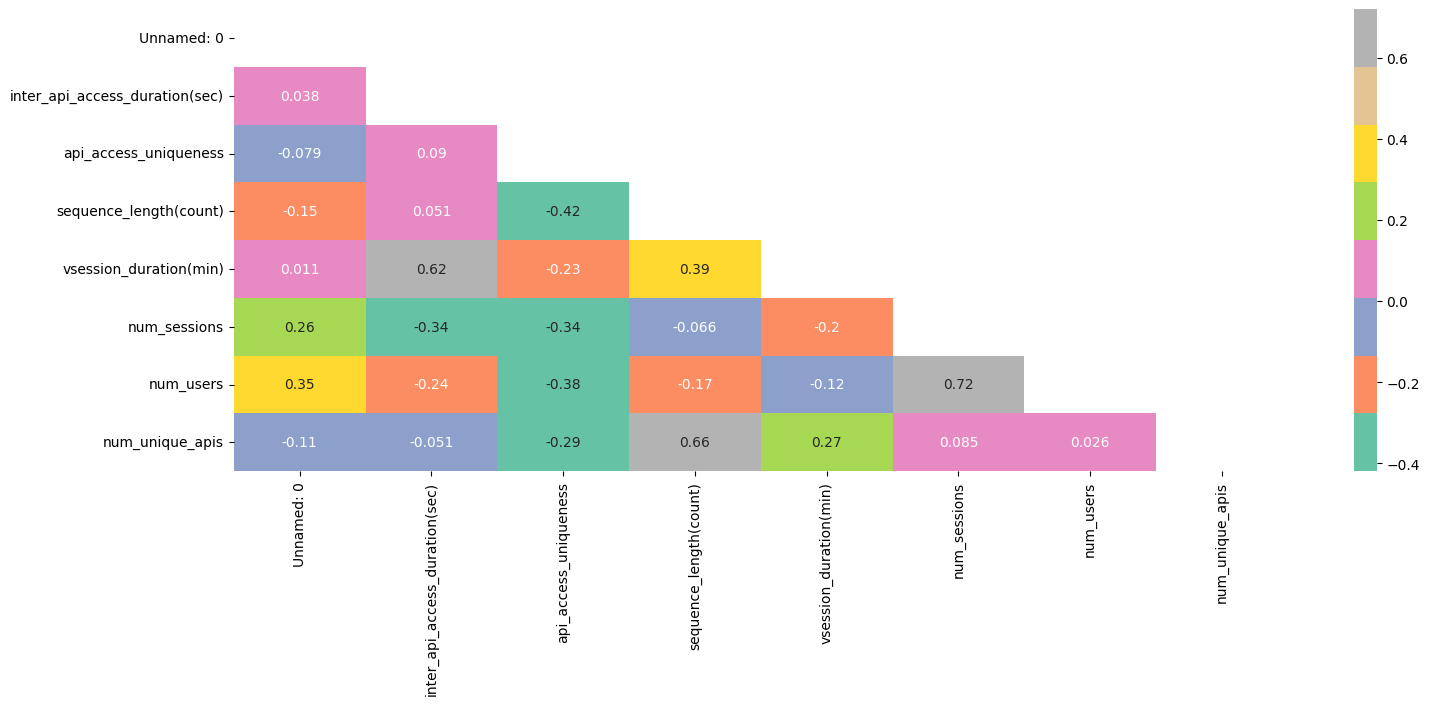

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The logistic regression:  0.9565419474785034
the Xgb :  0.9609574715314897
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001545 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1527
[LightGBM] [Info] Number of data points in the train set: 25817, number of used features: 8
[LightGBM] [Info] Start training from score -5.504828
[LightGBM] [Info] Start training from score -0.045648
[LightGBM] [Info] Start training from score -10.158788
[LightGBM] [Info] Start training from score -3.206060
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The logistic regression:  0.78119916337439
the Xgb :  1.0
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1527
[LightGBM] [Info] Number of data points in the train set: 25817, number of used features: 8
[LightGBM] [Info] Start training from score -7.386200
[LightGBM] [Info] Start training from score -3.258058
[LightGBM] [Info] Start training from score -1.347881
[LightGBM] [Info] Start training from score -0.355066
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import  numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from keras.models import  Sequential
from keras.layers import Dense
import keras.activations,keras.losses,keras.metrics
data=pd.read_csv('/kaggle/input/api-access-behaviour-anomaly-dataset/remaining_behavior_ext.csv')
print(data.columns)
val=data.columns.values
'''for i in data.columns.values:
    if len(data[i].value_counts()) < 5:
        sn.countplot(data[i])
        plt.show()'''
print()
y=[]
print(data.isna().sum())
print(data.info())
print(data.describe())

for i in data.columns.values:
    if len(data[i].value_counts()) < 5:
        y.append(i)

plt.figure(figsize=(17,6))
corr = data.corr(method='kendall',numeric_only = True)
my_m=np.triu(corr)
sn.heatmap(corr, mask=my_m, annot=True, cmap="Set2")
plt.show()

lab=LabelEncoder()
data['type_ip']=lab.fit_transform(data['ip_type'])
data['type_behaviour']=lab.fit_transform(data['behavior_type'])
data['source_type']=lab.fit_transform(data['source'])
data['behaviour']=lab.fit_transform(data['behavior'])


data['inter_api_access_duration(sec)']=data['inter_api_access_duration(sec)'].fillna(data['inter_api_access_duration(sec)'].mean())
data['api_access_uniqueness']=data['api_access_uniqueness'].fillna(data['api_access_uniqueness'].mean())


x=data[['inter_api_access_duration(sec)','api_access_uniqueness', 'sequence_length(count)','vsession_duration(min)','behaviour','num_sessions', 'num_users', 'num_unique_apis']]
y=data['type_ip']
x_train,x_test,y_train,y_test=train_test_split(x,y)



lr=LogisticRegression(max_iter=200)
lr.fit(x_train,y_train)
print('The logistic regression: ',lr.score(x_test,y_test))

xgb=XGBClassifier()
xgb.fit(x_train,y_train)
print("the Xgb : ",xgb.score(x_test,y_test))

lgb=LGBMClassifier()
lgb.fit(x_train,y_train)
print('The LGB',lgb.score(x_test,y_test))

tree=DecisionTreeClassifier(criterion='entropy',max_depth=1)
tree.fit(x_train,y_train)
print('Dtree ',tree.score(x_test,y_test))

rforest=RandomForestClassifier(criterion='entropy')
rforest.fit(x_train,y_train)
print('The random forest: ',rforest.score(x_test,y_test))

adb=AdaBoostClassifier()
adb.fit(x_train,y_train)
print('the adb ',adb.score(x_test,y_test))

grb=GradientBoostingClassifier()
grb.fit(x_train,y_train)
print('Gradient boosting ',grb.score(x_test,y_test))

bag=BaggingClassifier()
bag.fit(x_train,y_train)
print('Bagging',bag.score(x_test,y_test))
print('-----------------------------------')


x=data[['inter_api_access_duration(sec)','api_access_uniqueness', 'sequence_length(count)','vsession_duration(min)','behaviour','num_sessions', 'num_users', 'num_unique_apis']]
y=data['type_behaviour']
x_train,x_test,y_train,y_test=train_test_split(x,y)



lr=LogisticRegression(max_iter=200)
lr.fit(x_train,y_train)
print('The logistic regression: ',lr.score(x_test,y_test))

xgb=XGBClassifier()
xgb.fit(x_train,y_train)
print("the Xgb : ",xgb.score(x_test,y_test))

lgb=LGBMClassifier()
lgb.fit(x_train,y_train)
print('The LGB',lgb.score(x_test,y_test))

tree=DecisionTreeClassifier(criterion='entropy',max_depth=1)
tree.fit(x_train,y_train)
print('Dtree ',tree.score(x_test,y_test))

rforest=RandomForestClassifier(criterion='entropy')
rforest.fit(x_train,y_train)
print('The random forest: ',rforest.score(x_test,y_test))

adb=AdaBoostClassifier()
adb.fit(x_train,y_train)
print('the adb ',adb.score(x_test,y_test))

grb=GradientBoostingClassifier()
grb.fit(x_train,y_train)
print('Gradient boosting ',grb.score(x_test,y_test))

bag=BaggingClassifier()
bag.fit(x_train,y_train)
print('Bagging',bag.score(x_test,y_test))
print('-----------------------------------')


x=data[['inter_api_access_duration(sec)','api_access_uniqueness', 'sequence_length(count)','vsession_duration(min)','behaviour','num_sessions', 'num_users', 'num_unique_apis']]
y=data['source_type']
x_train,x_test,y_train,y_test=train_test_split(x,y)



lr=LogisticRegression(max_iter=200)
lr.fit(x_train,y_train)
print('The logistic regression: ',lr.score(x_test,y_test))

xgb=XGBClassifier()
xgb.fit(x_train,y_train)
print("the Xgb : ",xgb.score(x_test,y_test))

lgb=LGBMClassifier()
lgb.fit(x_train,y_train)
print('The LGB',lgb.score(x_test,y_test))

tree=DecisionTreeClassifier(criterion='entropy',max_depth=1)
tree.fit(x_train,y_train)
print('Dtree ',tree.score(x_test,y_test))

rforest=RandomForestClassifier(criterion='entropy')
rforest.fit(x_train,y_train)
print('The random forest: ',rforest.score(x_test,y_test))

adb=AdaBoostClassifier()
adb.fit(x_train,y_train)
print('the adb ',adb.score(x_test,y_test))

grb=GradientBoostingClassifier()
grb.fit(x_train,y_train)
print('Gradient boosting ',grb.score(x_test,y_test))

bag=BaggingClassifier()
bag.fit(x_train,y_train)
print('Bagging',bag.score(x_test,y_test))
print('-----------------------------------')


X=data[['inter_api_access_duration(sec)','type_ip','type_behaviour','api_access_uniqueness', 'sequence_length(count)','vsession_duration(min)','behaviour','num_sessions', 'num_users', 'num_unique_apis']]
y=data['source_type']
x_tr,x_te,y_tr,y_te=train_test_split(X,y)
models=Sequential()
models.add(Dense(units=X.shape[1],input_dim=X.shape[1],activation=keras.activations.sigmoid))
models.add(Dense(units=X.shape[1],activation=keras.activations.sigmoid))
models.add(Dense(units=X.shape[1],activation=keras.activations.relu))
models.add(Dense(units=X.shape[1],activation=keras.activations.sigmoid))

models.add(Dense(units=1,activation=keras.activations.sigmoid))
models.compile(optimizer='adam',metrics='accuracy',loss=keras.losses.binary_crossentropy)
models.fit(x_tr,y_tr,batch_size=20,epochs=100)

In [ ]:
y_pred1= models.predict(x_te)
y_pred_binary1 = (y_pred1 > 0.5).astype(int)

# Print the predicted output
# Print x_test and y_pred in one line
print(y_te)
for x_sample, y_actual, y_sample in zip(x_te.values, y_te.values, y_pred_binary1.flatten()):
    print(f"Input: {x_sample}, Actual Output: {y_actual}, Predicted Output: {y_sample}")

Streaming output truncated to the last 5000 lines.
 1.15000000e+01 3.36090000e+04 5.80000000e+01 7.00000000e+00
 6.00000000e+00 1.40000000e+01], Actual Output: 1, Predicted Output: 1
Input: [1.15430909e+00 1.00000000e+00 3.00000000e+00 4.00000000e-01
 5.50000000e+01 3.81000000e+03 7.40000000e+01 2.00000000e+00
 1.00000000e+00 2.20000000e+01], Actual Output: 0, Predicted Output: 0
Input: [6.58318354e+00 1.00000000e+00 1.00000000e+00 3.16455696e-02
 1.58000000e+02 6.24090000e+04 9.00000000e+00 1.00000000e+00
 1.00000000e+00 5.00000000e+00], Actual Output: 1, Predicted Output: 1
Input: [3.28121053e+00 1.00000000e+00 3.00000000e+00 5.26315789e-01
 1.90000000e+01 3.74100000e+03 7.40000000e+01 1.00000000e+00
 1.00000000e+00 1.00000000e+01], Actual Output: 0, Predicted Output: 1
Input: [4.10592857e+00 1.00000000e+00 3.00000000e+00 6.42857143e-01
 1.40000000e+01 3.44900000e+03 7.40000000e+01 1.00000000e+00
 1.00000000e+00 9.00000000e+00], Actual Output: 1, Predicted Output: 1
Input: [1.7423875

Class 0:
  Accuracy: 0.7920761670761671
  Precision: 0.7920761670761671
  F1-score: 0.6718770353002474
Class 1:
  Accuracy: 0.6557009345794392
  Precision: 0.6557009345794392
  F1-score: 0.73581541688516
269/269 [==============================] - 1s 3ms/step
Confusion Matrix:
[[2579 1842]
 [ 677 3508]]
Accuracy: 0.7072972344875668
Precision: [0.48628864 0.48634515 0.48628545 ... 1.         1.         1.        ]
Recall: [1.00000000e+00 1.00000000e+00 9.99761051e-01 ... 4.77897252e-04
 2.38948626e-04 0.00000000e+00]
F1 Score: 0.73581541688516


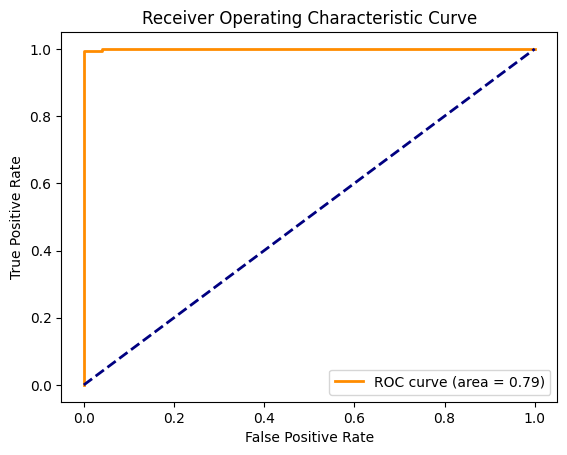

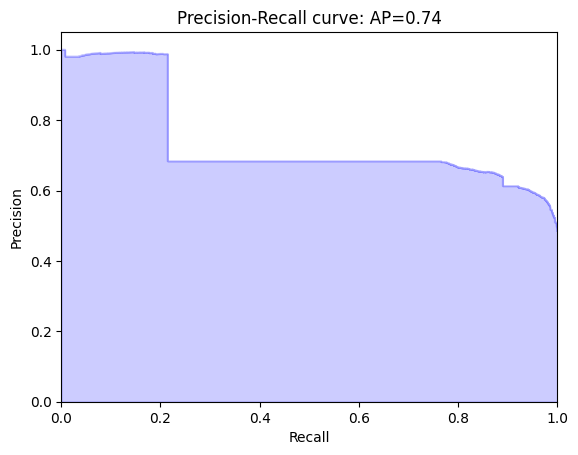

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report

# Assuming 'y_test' is the actual labels and 'y_pred_binary' is the predicted labels

# Calculate classification report
report1 = classification_report(y_te, y_pred_binary1, output_dict=True)

# Print accuracy, precision, and F1-score for each class
for class_label, metrics in report1.items():
    if class_label.isdigit():  # Check if class_label is a numeric class identifier
        print(f"Class {int(class_label)}:")
        print(f"  Accuracy: {metrics['precision']}")
        print(f"  Precision: {metrics['precision']}")
        print(f"  F1-score: {metrics['f1-score']}")

# Predict the output for the test data
y_pred1 = models.predict(x_te)
y_pred_binary1 = (y_pred1 > 0.5).astype(int)

# Calculate metrics
conf_matrix1 = confusion_matrix(y_te, y_pred_binary1)
accuracy1 = accuracy_score(y_te, y_pred_binary1)
precision1 = precision_score(y_te, y_pred_binary1)
recall1 = recall_score(y_te, y_pred_binary1)
f1t = f1_score(y_te, y_pred_binary1)

# ROC Curve
fpr1, tpr1, _ = roc_curve(y_te, y_pred1)
roc_auc1 = auc(fpr1, tpr1)

# Precision-Recall Curve
precision1, recall1, _ = precision_recall_curve(y_te, y_pred1)
avg_precision1 = average_precision_score(y_te, y_pred1)

# Print and plot metrics
print(f"Confusion Matrix:\n{conf_matrix1}")
print(f"Accuracy: {accuracy1}")
print(f"Precision: {precision1}")
print(f"Recall: {recall1}")
print(f"F1 Score: {f1t}")

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

plt.figure()
plt.step(recall1, precision1, color='b', alpha=0.2, where='post')
plt.fill_between(recall1, precision1, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(avg_precision1))
plt.show()
